In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]

print(X.shape, y.shape)

(1599, 11) (1599,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
reg = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

reg.fit(X_train, y_train)
print("Random Forest Regressor trained successfully!")

Random Forest Regressor trained successfully!


In [6]:
y_pred = reg.predict(X_test)
y_pred[:10]

array([5.35666667, 5.18666667, 5.45333333, 5.17      , 5.98666667,
       5.04333333, 5.1       , 4.91666667, 6.07666667, 5.89      ])

In [7]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.30644180555555556
R-squared: 0.5310802479282583


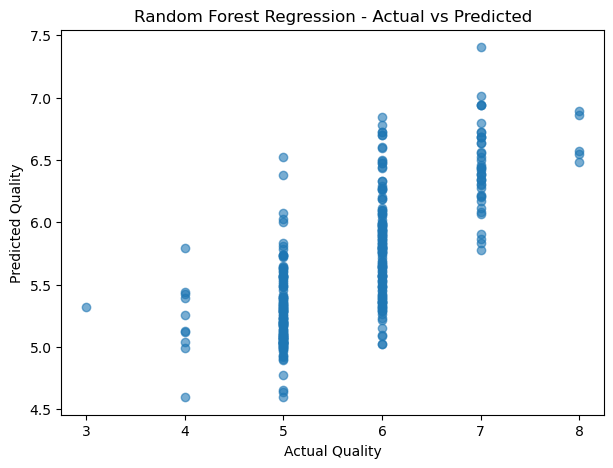

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

In [9]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': reg.feature_importances_
}).sort_values(by="Importance", ascending=False)

importances

,Feature,Importance
10,alcohol,0.271277
9,sulphates,0.151592
1,volatile acidity,0.107264
6,total sulfur dioxide,0.078176
4,chlorides,0.069370
8,pH,0.061289
3,residual sugar,0.058843
7,density,0.053556
0,fixed acidity,0.052189
2,citric acid,0.048250
